# The best classifier

Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not.

You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

    k-Nearest Neighbour
    Decision Tree
    Support Vector Machine
    Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

    Jaccard index
    F1-score
    LogLoass

## Import Library

In [1]:
#data processing
import numpy as np
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#datascience model
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#accuracy mesurement 
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

#data cleaning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load and clean data

Load data from Cognitive class

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-11-16 17:14:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2020-11-16 17:14:26 (305 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [5]:
df.shape

(346, 10)

In [6]:
#remove nan values
df = df.dropna(axis=1)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [8]:
df.shape

(346, 8)

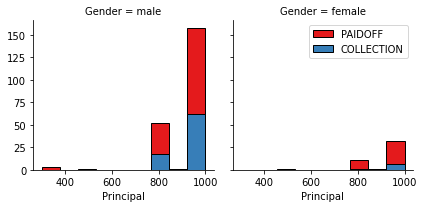

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

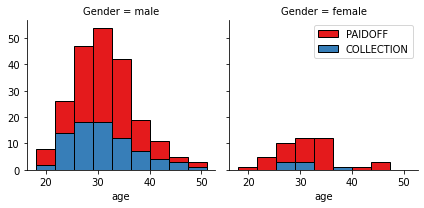

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Data cleaning and preprocessing

In [11]:
print(df.loan_status.unique())

['PAIDOFF' 'COLLECTION']


In [12]:
print(df.Gender.unique())

['male' 'female']


In [13]:
print(df.education.unique())

['High School or Below' 'Bechalor' 'college' 'Master or Above']


Encode alphabetic values

In [14]:
#we change Gender male to 0 and female to 1
dict_genre = {'male':0, 'female':1}
dict_loan = {'PAIDOFF':0, 'COLLECTION':1}

df = df.replace({'Gender': 'male'}, 0)
df = df.replace({'Gender': 'female'}, 1)

df = df.replace({'loan_status': 'PAIDOFF'}, 0)
df = df.replace({'loan_status': 'COLLECTION'}, 1)

df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1000,30,9/8/2016,10/7/2016,45,High School or Below,0
1,0,1000,30,9/8/2016,10/7/2016,33,Bechalor,1
2,0,1000,15,9/8/2016,9/22/2016,27,college,0
3,0,1000,30,9/9/2016,10/8/2016,28,college,1
4,0,1000,30,9/9/2016,10/8/2016,29,college,0


In [15]:
embarked_dummies = pd.get_dummies(df.education, prefix='education')
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop(['education'], axis=1)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,0,1000,30,9/8/2016,10/7/2016,45,0,0,1,0,0
1,0,1000,30,9/8/2016,10/7/2016,33,1,1,0,0,0
2,0,1000,15,9/8/2016,9/22/2016,27,0,0,0,0,1
3,0,1000,30,9/9/2016,10/8/2016,28,1,0,0,0,1
4,0,1000,30,9/9/2016,10/8/2016,29,0,0,0,0,1


In [16]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['duration'] = (df['effective_date'] - df['due_date']).dt.days

In [17]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,Gender,education_Bechalor,education_High School or Below,education_Master or Above,education_college,duration
0,0,1000,30,2016-09-08,2016-10-07,45,0,0,1,0,0,-29
1,0,1000,30,2016-09-08,2016-10-07,33,1,1,0,0,0,-29
2,0,1000,15,2016-09-08,2016-09-22,27,0,0,0,0,1,-14
3,0,1000,30,2016-09-09,2016-10-08,28,1,0,0,0,1,-29
4,0,1000,30,2016-09-09,2016-10-08,29,0,0,0,0,1,-29


In [18]:
df = df.drop(['effective_date', 'due_date'], axis=1)
df.head()

,loan_status,Principal,terms,age,Gender,education_Bechalor,education_High School or Below,education_Master or Above,education_college,duration
0,0,1000,30,45,0,0,1,0,0,-29
1,0,1000,30,33,1,1,0,0,0,-29
2,0,1000,15,27,0,0,0,0,1,-14
3,0,1000,30,28,1,0,0,0,1,-29
4,0,1000,30,29,0,0,0,0,1,-29


## Model testing 

in this section we will find the Best model for our problem

Standart scaling

In [19]:
scaler = StandardScaler()

In [20]:
y = df['loan_status'].values
df = df.drop(['loan_status'], axis=1)
X = df.values
scaler = scaler.fit(X)
X = scaler.transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)

(276, 9)


## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics


def best_knn(X_train_, X_test_, y_train_, y_test_, min_, max_):
    """This function return the best classifier knn"""
    out = []
    max__ = -np.inf
    clf = None
    for k in range(min_,max_):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train_, y_train_)
        y_hat = neigh.predict(X_test_)
        y_hat_train = neigh.predict(X_train_)
        traintloss = metrics.accuracy_score(y_train_, y_hat_train)
        testloss = metrics.accuracy_score(y_test_, y_hat)
        if testloss > max__:
            max__ = testloss
            clf = neigh
        out.append([k, testloss, traintloss])
    return np.array(out), clf

(7, 3)


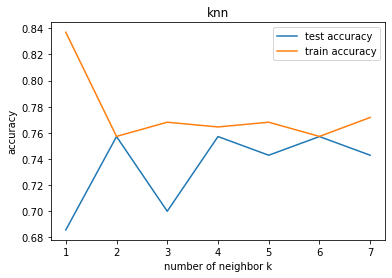

In [23]:
out, Knn_class  = best_knn(X_train, X_test, y_train, y_test, 1, 8)
print(out.shape)
plt.plot(out[:,0], out[:,1], label = 'test accuracy')
plt.plot(out[:,0], out[:,2], label = 'train accuracy')
plt.xlabel('number of neighbor k')
plt.ylabel('accuracy')
plt.title('knn')
plt.legend(loc='upper right')

### The best KNeighborsClassifier is for k = 2

## Decision Tree

In [24]:
from sklearn import tree

def decision_tree(X_train_, X_test_, y_train_, y_test_, min_, max_):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 4)
    clf = clf.fit(X_train_, y_train_)
    y_hat = clf.predict(X_test_)
    accuracy = metrics.accuracy_score(y_test_, y_hat)
    return clf, accuracy

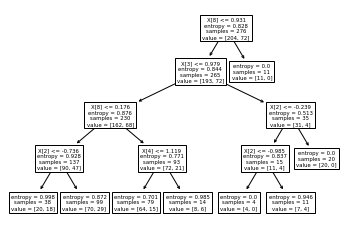

In [25]:
D_tree, acc = decision_tree(X_train, X_test, y_train, y_test, 1, 8)

tree.plot_tree(D_tree)
plt.show()

In [26]:
print("the accuracy of decision_tree",out[1][1])

the accuracy of decision_tree 0.7571428571428571


## Logistic Regression 

In [27]:
L_regression = LogisticRegression(C=0.01).fit(X_train, y_train)
y_hat = L_regression.predict(X_test)
acc = metrics.accuracy_score(y_test, y_hat)
print("the accuracy of LogisticRegression", acc)

the accuracy of LogisticRegression 0.8


## Support Vector Machine

In [28]:
from sklearn import svm

L_svm = svm.SVC()
L_svm.fit(X_train, y_train)
y_hat = L_svm.predict(X_test)
acc = metrics.accuracy_score(y_test, y_hat)
print("the accuracy of LogisticRegression", acc)

the accuracy of LogisticRegression 0.8


## Jacard score, f1_score and log_loss

In [29]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-11-16 17:14:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-11-16 17:14:29 (109 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [30]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [31]:
test_df = test_df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

#we change Gender male to 0 and female to 1
dict_genre = {'male':0, 'female':1}
dict_loan = {'PAIDOFF':0, 'COLLECTION':1}

test_df = test_df.replace({'Gender': 'male'}, 0)
test_df = test_df.replace({'Gender': 'female'}, 1)

test_df = test_df.replace({'loan_status': 'PAIDOFF'}, 0)
test_df = test_df.replace({'loan_status': 'COLLECTION'}, 1)

embarked_dummies = pd.get_dummies(test_df.education, prefix='education')
test_df = pd.concat([test_df, embarked_dummies], axis=1)
test_df = test_df.drop(['education'], axis=1)

test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['duration'] = (test_df['effective_date'] - test_df['due_date']).dt.days

test_df = test_df.drop(['effective_date', 'due_date'], axis=1)
test_df.head()

,loan_status,Principal,terms,age,Gender,education_Bechalor,education_High School or Below,education_Master or Above,education_college,duration
0,0,1000,30,50,1,1,0,0,0,-29
1,0,300,7,35,0,0,0,1,0,-6
2,0,1000,30,43,1,0,1,0,0,-29
3,0,1000,30,26,0,0,0,0,1,-29
4,0,800,15,29,0,1,0,0,0,-14


In [32]:
y_val = test_df['loan_status'].values
test_df = test_df.drop(['loan_status'], axis=1)
X_val = test_df.values
X_val = scaler.transform(X_val)

In [33]:
y_hat = Knn_class.predict(X_val)
print('f1 score for Knn',f1_score(y_val, y_hat, average='weighted'))
print('jaccard score for Knn',jaccard_score(y_val, y_hat, average='weighted'))
#print('log_loss score for Knn',log_loss(y_test, y_hat))

f1 score for Knn 0.6212664277180406
jaccard score for Knn 0.5349794238683128


In [34]:
y_hat = D_tree.predict(X_val)

print('f1 score for DecisionTreeClassifier',f1_score(y_val, y_hat, average='weighted'))
print('jaccard score for DecisionTreeClassifier',jaccard_score(y_val, y_hat, average='weighted'))
#print('log_loss score for DecisionTreeClassifier',log_loss(y_test, y_hat))

f1 score for DecisionTreeClassifier 0.6304176516942475
jaccard score for DecisionTreeClassifier 0.5486968449931412


In [35]:
y_hat = L_svm.predict(X_val)

print('F1 score for svm',f1_score(y_val, y_hat, average='weighted'))
print('Jaccard score for svm',jaccard_score(y_val, y_hat, average='weighted'))
#print('Log_loss score for svm',log_loss(y_test, y_hat_p))

F1 score for svm 0.6304176516942475
Jaccard score for svm 0.5486968449931412


In [36]:
y_hat = L_regression.predict(X_val)
y_hat_p = L_regression.predict_proba(X_val)

print('F1 score for LogisticRegression',f1_score(y_val, y_hat, average='weighted'))
print('Jaccard score for LogisticRegression',jaccard_score(y_val, y_hat, average='weighted'))
print('Log_loss score for LogisticRegression',log_loss(y_val, y_hat_p))

F1 score for LogisticRegression 0.6304176516942475
Jaccard score for LogisticRegression 0.5486968449931412
Log_loss score for LogisticRegression 0.5754318331209787


## The best model is DecisionTreeClassifier

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.53    | 0.62     | NA      |
| Decision Tree      | 0.55    | 0.63     | NA      |
| SVM                | 0.55    | 0.63     | NA      |
| LogisticRegression | 0.55    | 0.63     | 0.57    |